In [1]:
using Pkg
#Pkg.add("Knet")
using IJulia

Pkg.add("RData")
#ENV["GRDIR"]=""
#Pkg.build("GR")

using DataFrames
using Plots;
using StatsPlots;

include(Knet.dir("data","housing.jl"));
x,y = housing();
#Base.@debug()
#Now that we have the data
predict(ω, x) = ω[1] * x .+ ω[2];
loss(ω, x, y) = mean(abs2, predict(ω, x)-y);
lossgradient = grad(loss);

function train(ω, data; lr=0.01)
    for (x,y) in data
        dω = lossgradient(ω, x, y)
        for i in 1:length(ω)
            ω[i] -= dω[i]*lr
        end
    end
    return ω
end;

#gr();

ω = Any[ 0.1*randn(1,13), 0.0 ];
errdf = DataFrame(Epoch=1:20, Error=0.0);
let
    cntr=1
    cntr::Int64
    println(cntr)
    for i=1:200
        train(ω, [(x,y)])
        if mod(i, 10) == 0
            println("Epoch $i: $(round(loss(ω,x,y)))")
            errdf[cntr, :Epoch]=i
            errdf[cntr, :Error]=loss(ω,x,y)
            cntr+=1
        end
    end
end


ω = Any[0.1f0*randn(Float32,64,13), zeros(Float32,64,1),
        0.1f0*randn(Float32,15,64), zeros(Float32,15,1),
        0.1f0*randn(Float32,1,15),  zeros(Float32,1,1)]
function predict(ω, x)
    x = mat(x)
    for i=1:2:length(ω)-2
        x = relu.(ω[i]*x .+ ω[i+1])
    end
    return ω[end-1]*x .+ ω[end]
end

loss(ω, x, y) = mean(abs2, predict(ω, x)-y)
lossgradient = grad(loss)

errdf = DataFrame(Epoch=1:60, Error=0.0)
let
    cntr = 1
    for i=1:600
        train(ω, [(x,y)])
        if mod(i, 10) == 0
            errdf[cntr, :Epoch]=i
            errdf[cntr, :Error]=loss(ω,x,y)
            cntr+=1
        end
    end
end



p3 = scatter(errdf[:,:Epoch], errdf[:,:Error], xlabel="Epoch", ylabel="Error")
p4 = scatter(predict(ω, x)', y', reg=true, xlabel="Predicted", ylabel="Observed")


xtrn, xtst = x[:, 1:400], x[:, 401:end]
ytrn, ytst = y[:, 1:400], y[:, 401:end]

ω = Any[0.1f0*randn(Float32,64,13), zeros(Float32,64,1),
        0.1f0*randn(Float32,15,64), zeros(Float32,15,1),
        0.1f0*randn(Float32,1,15),  zeros(Float32,1,1)]
errdf = DataFrame(Epoch=1:60, TrnError=0.0, ValError=0.0)
let
    cntr = 1
    for i=1:600
        train(ω, [(xtrn, ytrn)])
        if mod(i, 10) == 0
            errdf[cntr, :Epoch]=i
            errdf[cntr, :TrnError]=loss(ω,xtrn,ytrn)
            errdf[cntr, :ValError]=loss(ω,xtst,ytst)
            cntr+=1
        end
    end
end

#using StatPlots
@df errdf[5:60,:] plot(:Epoch, [:ValError, :TrnError], xlabel="Epoch", ylabel="Error",
                       label=["Validation" "Training"], lw=3)
#gui()
#using PyPlot
# use x = linspace(0,2*pi,1000) in Julia 0.6
#x = range(0; stop=2*pi, length=1000); y = sin.(3 * x + 4 * cos.(2 * x));
#plot(x, y, color="red", linewidth=2.0, linestyle="--")
#title("A sinusoidally modulated sinusoid")
#After doing

#predict
#Epoch 10:


1
Epoch 10: 382.0
Epoch 20: 261.0
Epoch 30: 182.0
Epoch 40: 129.0
Epoch 50: 94.0
Epoch 60: 71.0
Epoch 70: 55.0
Epoch 80: 45.0
Epoch 90: 38.0
Epoch 100: 33.0
Epoch 110: 30.0
Epoch 120: 28.0
Epoch 130: 26.0
Epoch 140: 25.0
Epoch 150: 24.0
Epoch 160: 24.0
Epoch 170: 24.0
Epoch 180: 23.0
Epoch 190: 23.0
Epoch 200: 23.0


In [2]:

#using Knet;
#using DataFrames
#using Plots;
#using StatsPlots;

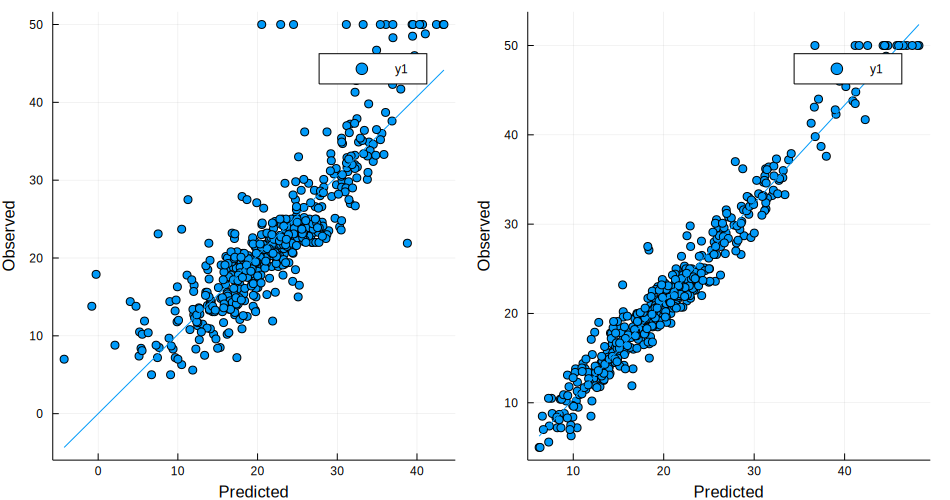

In [3]:
plot(p3, p4, layout=(1,2), size=(950,500))
plot(p2, p4, layout=(1,2), size=(950,500))


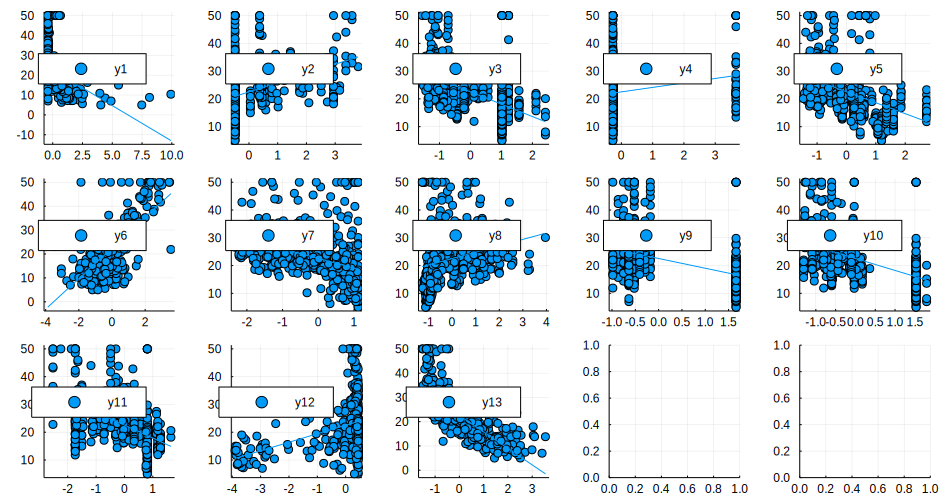

In [4]:
scatter(x', y[1,:], layout=(3,5), reg=true, size=(950,500))


In [5]:
p1 = scatter(errdf[:,:Epoch], errdf[:,:Error], xlabel="Epoch", ylabel="Error")
p2 = scatter(predict(ω, x)', y', reg=true, xlabel="Predicted", ylabel="Observed")
plot(p1, p2, layout=(1,2), size=(950,500))


ArgumentError: ArgumentError: column name :Error not found in the data frame

In [6]:
size(y)

(1, 506)

In [7]:
size(x)

(13, 506)

In [12]:
x[1,:]

506-element Array{Float64,1}:
 -0.4193669292132159 
 -0.41692666996409716
 -0.41692899512774567
 -0.4163384035610223 
 -0.41207405342964176
 -0.4166313741807354 
 -0.40983724599976823
 -0.4032965606564894 
 -0.39554330247050884
 -0.4003331395864542 
 -0.3939563782803959 
 -0.4064448322365817 
 -0.40919898857825027
  ⋮                  
 -0.3875993808653499 
 -0.3992926288537428 
 -0.38643331129561853
 -0.3889003099266953 
 -0.3923020243444759 
 -0.3994274883453568 
 -0.39401566995343307
 -0.4128204309608158 
 -0.4148386730077287 
 -0.41303783376195213
 -0.40736094671409745
 -0.41458988049733736

In [13]:
predict(ω, x)'

506×1 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 25.8126645841057  
 22.72713170488955 
 32.674874563898314
 31.736465662073943
 31.82621833178583 
 24.824048976519425
 20.145472480773776
 19.850949015659264
 16.459094422549825
 18.939247516205025
 20.22875908567783 
 19.28545040049152 
 20.97573915586263 
  ⋮                
 20.69156855243338 
 20.486733577047545
 16.315347155171196
 18.485720628540715
 20.45413460370497 
 16.862614986988287
 19.2448941135277  
 25.387518622432058
 21.35887227678078 
 30.940390946700262
 28.047942895892582
 20.570522078373884

In [14]:
y'


506×1 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 24.0
 21.6
 34.7
 33.4
 36.2
 28.7
 22.9
 27.1
 16.5
 18.9
 15.0
 18.9
 21.7
  ⋮  
 24.5
 23.1
 19.7
 18.3
 21.2
 17.5
 16.8
 22.4
 20.6
 23.9
 22.0
 11.9